In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [2]:
#model 2-7
#test data china data_0_10

In [3]:
test_folder = home_path+"\\save"+"\\"+"china"+"\\"+"data_0_5"

In [4]:
#ecgdf length 확인

In [5]:
test_data = pd.DataFrame(ecgtodf(test_folder,288))

0.csv
1.csv
10.csv
100.csv
1000.csv
1001.csv
1002.csv
1003.csv
1004.csv
1005.csv
1006.csv
1007.csv
1008.csv
1009.csv
101.csv
1010.csv
1011.csv
1012.csv
1013.csv
1014.csv
1015.csv
1016.csv
1017.csv
1018.csv
1019.csv
102.csv
1020.csv
1021.csv
1022.csv
1023.csv
1024.csv
1025.csv
1026.csv
1027.csv
1028.csv
1029.csv
103.csv
1030.csv
1031.csv
1032.csv
1033.csv
1034.csv
1035.csv
1036.csv
1037.csv
1038.csv
1039.csv
104.csv
1040.csv
1041.csv
1042.csv
1043.csv
1044.csv
1045.csv
1046.csv
1047.csv
1048.csv
1049.csv
105.csv
1050.csv
1051.csv
1052.csv
1053.csv
1054.csv
1055.csv
1056.csv
1057.csv
1058.csv
1059.csv
106.csv
1060.csv
1061.csv
1062.csv
1063.csv
1064.csv
1065.csv
1066.csv
1067.csv
1068.csv
1069.csv
107.csv
1070.csv
1071.csv
1072.csv
1073.csv
1074.csv
1075.csv
1076.csv
1077.csv
1078.csv
1079.csv
108.csv
1080.csv
1081.csv
1082.csv
1083.csv
1084.csv
1085.csv
1086.csv
1087.csv
1088.csv
1089.csv
109.csv
1090.csv
1091.csv
1092.csv
1093.csv
1094.csv
1095.csv
1096.csv
1097.csv
1098.csv
1099.csv
1

In [6]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-1.034008,-1.021619,-1.016513,-1.011550,-0.994381,-0.964667,-0.940621,-0.932679,-0.930350,-0.929879,...,-1.256134,-1.310269,-1.280498,-1.262521,-1.310985,-1.341991,-1.302393,-1.274513,-1.303043,-1.298028
1,-0.879451,-0.846679,-0.813915,-0.806797,-0.836170,-0.859923,-0.833600,-0.779381,-0.739786,-0.726012,...,-1.178137,-1.174407,-1.164169,-1.158478,-1.156890,-1.147296,-1.133851,-1.134285,-1.153705,-1.162303
2,0.062458,0.066925,0.076950,0.093868,0.106504,0.106553,0.103330,0.107717,0.114213,0.113230,...,-0.329137,-0.328850,-0.325865,-0.324947,-0.328098,-0.328089,-0.323546,-0.322099,-0.328312,-0.334031
3,-0.063556,-0.062004,-0.059839,-0.059849,-0.059857,-0.056668,-0.053646,-0.056847,-0.061997,-0.060042,...,-0.089559,-0.087114,-0.084976,-0.082311,-0.079933,-0.078300,-0.075782,-0.073133,-0.073732,-0.075274
4,-0.076936,-0.074255,-0.076014,-0.079933,-0.081813,-0.079736,-0.076030,-0.074773,-0.074641,-0.073387,...,-0.119817,-0.112618,-0.106834,-0.108598,-0.115114,-0.117900,-0.115450,-0.112779,-0.113035,-0.113726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,-0.119699,-0.120436,-0.121197,-0.120480,-0.118191,-0.118094,-0.121417,-0.123269,-0.118345,-0.110695,...,-0.130349,-0.130851,-0.126502,-0.124767,-0.127219,-0.125277,-0.120048,-0.121433,-0.127448,-0.125409
3791,-0.115414,-0.109420,-0.112658,-0.117271,-0.111160,-0.098477,-0.089905,-0.089123,-0.094415,-0.103152,...,-0.125729,-0.123853,-0.120665,-0.121118,-0.123404,-0.121867,-0.117630,-0.115500,-0.115537,-0.113144
3792,-0.105994,-0.107315,-0.105076,-0.102050,-0.098443,-0.094895,-0.093000,-0.094077,-0.096148,-0.096893,...,-0.096916,-0.095496,-0.089201,-0.083776,-0.081542,-0.080075,-0.078855,-0.077752,-0.074077,-0.066533
3793,-0.060860,-0.063220,-0.060603,-0.059561,-0.059584,-0.056858,-0.053856,-0.054277,-0.057551,-0.062747,...,-0.098394,-0.086875,-0.074790,-0.070004,-0.071471,-0.075719,-0.079740,-0.081923,-0.083075,-0.082803


In [7]:
test_data.shape

(3795, 288)

In [8]:
def to_mixmax_tensor(x):
    
    record = x.to_numpy()
    t_record = record.T

    scaler = MinMaxScaler()
    scaler.fit(t_record)

    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    x=x_tensor_input(record)


    return x

In [9]:
test_data = to_mixmax_tensor(test_data)

In [10]:
print(test_data.shape)

(3795, 288, 1)


In [11]:
test_data

array([[[0.2371735 ],
        [0.24181265],
        [0.24372455],
        ...,
        [0.14711736],
        [0.13643455],
        [0.13831235]],

       [[0.28212051],
        [0.29605763],
        [0.3099915 ],
        ...,
        [0.17374549],
        [0.16548639],
        [0.16183006]],

       [[0.27409521],
        [0.27587092],
        [0.27985506],
        ...,
        [0.12125783],
        [0.11878862],
        [0.11651585]],

       ...,

       [[0.10350427],
        [0.10300948],
        [0.10384798],
        ...,
        [0.11408217],
        [0.11545849],
        [0.11828424]],

       [[0.12117401],
        [0.12029311],
        [0.12126981],
        ...,
        [0.11331388],
        [0.1128842 ],
        [0.11298542]],

       [[0.12679634],
        [0.12823786],
        [0.12761908],
        ...,
        [0.11426062],
        [0.1139368 ],
        [0.11373314]]])

In [12]:
test_data.shape

(3795, 288, 1)

In [13]:
model = kr.models.load_model(git_path+"\\test\\02\\07\\model02.h5")

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 286, 8)            32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 143, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 141, 16)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 68, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 34, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 32)            3

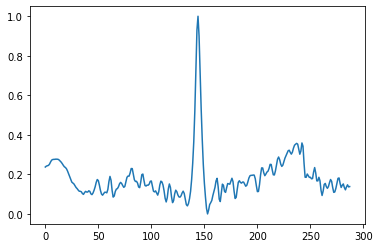

In [15]:
plt.plot(test_data[0])

In [16]:
predict = model.predict(test_data)

In [17]:
print(predict)

[[7.6260579e-01 2.3739110e-01 5.0693286e-11 3.0928654e-06 5.9324155e-14]
 [8.4025872e-01 1.5974113e-01 1.7852417e-11 1.1344962e-07 2.5688985e-16]
 [7.6789629e-01 2.3208936e-01 1.7511710e-10 1.4376738e-05 1.8206404e-15]
 ...
 [7.3097479e-01 2.6902500e-01 9.6025399e-10 2.5046344e-07 6.7619714e-20]
 [7.6256400e-01 2.3743583e-01 7.7174073e-10 1.8622015e-07 4.1611453e-19]
 [6.2429398e-01 3.7570569e-01 1.4625476e-09 3.5096477e-07 2.0203227e-18]]


In [18]:
output = []

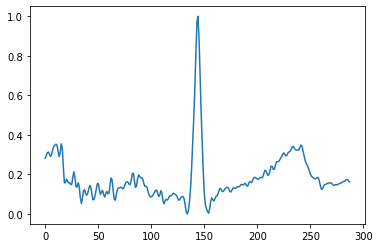

In [19]:
plt.plot(test_data[1])

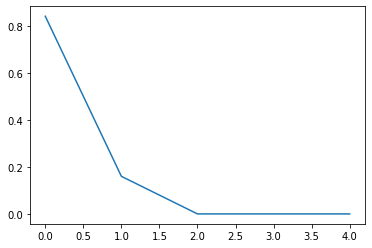

In [20]:
plt.plot(predict[1])

In [24]:
for i in range(len(predict)):
    if np.argmax(predict[i])!=0:
        print(i,np.argmax(predict[i]))
    
    output.append(np.argmax(predict[i]))

2971 1
2972 1
2974 1
2976 1
2977 1
2978 1
2980 1
2982 1
2983 1
2984 1
2985 1
2986 1
2991 1
2992 1
2993 1
2994 1
2995 1
2996 1
2997 1
2998 1
2999 1
3000 1
3003 1
3004 1
3005 1
3216 1


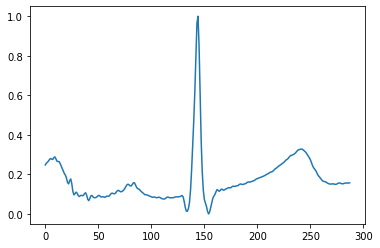

In [34]:
plt.plot(test_data[2981])

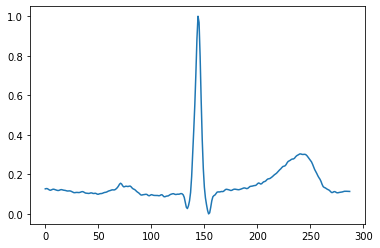

In [36]:
plt.plot(test_data[-1])

In [27]:
cnt = 0

In [28]:
for i in range(len(output)):
    if output[i]!=0:
        print(i)
        cnt+=1

2971
2972
2974
2976
2977
2978
2980
2982
2983
2984
2985
2986
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3003
3004
3005
3216
6766
6767
6769
6771
6772
6773
6775
6777
6778
6779
6780
6781
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6798
6799
6800
7011


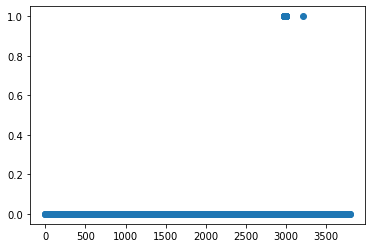

In [22]:
plt.plot(output,"o")